# 귀펭 (귀여운 펭귄처럼) 미니 프로젝트
* 목적: 남부터미널 근처의 괜찮은 음식점 찾아보기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-1">1. 데이터 불러오기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2">2. 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#2.1-컬럼명-통일" data-toc-modified-id="2.1-컬럼명-통일-2.1">2.1 컬럼명 통일</a></span></li><li><span><a href="#2.2-결측값-처리" data-toc-modified-id="2.2-결측값-처리-2.2">2.2 결측값 처리</a></span></li><li><span><a href="#2.2-address-컬럼" data-toc-modified-id="2.2-address-컬럼-2.3">2.2 address 컬럼</a></span></li><li><span><a href="#2.3-eval_cnt,-review_cnt" data-toc-modified-id="2.3-eval_cnt,-review_cnt-2.4">2.3 eval_cnt, review_cnt</a></span><ul class="toc-item"><li><span><a href="#2.3.1-eval_cnt" data-toc-modified-id="2.3.1-eval_cnt-2.4.1">2.3.1 eval_cnt</a></span></li><li><span><a href="#2.3.2-review_cnt" data-toc-modified-id="2.3.2-review_cnt-2.4.2">2.3.2 review_cnt</a></span></li><li><span><a href="#2.3.3-이상값-처리" data-toc-modified-id="2.3.3-이상값-처리-2.4.3">2.3.3 이상값 처리</a></span></li><li><span><a href="#2.3.4-컬럼-데이터-형식-변경" data-toc-modified-id="2.3.4-컬럼-데이터-형식-변경-2.4.4">2.3.4 컬럼 데이터 형식 변경</a></span></li></ul></li><li><span><a href="#2.4-지리-정보-추가하기" data-toc-modified-id="2.4-지리-정보-추가하기-2.5">2.4 지리 정보 추가하기</a></span></li><li><span><a href="#2.5-diatance-컬럼-추가" data-toc-modified-id="2.5-diatance-컬럼-추가-2.6">2.5 diatance 컬럼 추가</a></span></li><li><span><a href="#2.5-저장하기" data-toc-modified-id="2.5-저장하기-2.7">2.5 저장하기</a></span></li></ul></li><li><span><a href="#3.-데이터-살펴보기" data-toc-modified-id="3.-데이터-살펴보기-3">3. 데이터 살펴보기</a></span><ul class="toc-item"><li><span><a href="#3.1-데이터-분포" data-toc-modified-id="3.1-데이터-분포-3.1">3.1 데이터 분포</a></span></li><li><span><a href="#3.2-필터링" data-toc-modified-id="3.2-필터링-3.2">3.2 필터링</a></span></li></ul></li><li><span><a href="#4.-지표-설정" data-toc-modified-id="4.-지표-설정-4">4. 지표 설정</a></span></li></ul></div>

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import folium
from tqdm import tqdm_notebook

In [2]:
plt.rc('font', size=13)
plt.rc('font', family='NanumGothic')

In [3]:
# 내가 크롤링한 데이터
df1 = pd.read_csv('source/Restaurant_analysis_miniproject/restaurant_raw_200630.csv', index_col=0)
df1.head()

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",(지번) 서초동 1445-13,3.9,72건,리뷰 267
1,봉산옥 서초동본점,국수,(지번) 서초3동 1451-9,3.7,79건,리뷰 146
2,장꼬방,"찌개,전골",(지번) 서초동 1438-8,3.2,299건,리뷰 124
3,해담채 남부터미널점,"해물,생선",(지번) 서초동 1600-9,3.1,10건,리뷰 47
4,카페로비,디저트카페,(지번) 서초동 1564-4,3.9,15건,리뷰 126


In [4]:
# 윤성님이 크롤링한 데이터
df2 = pd.read_csv('source/Restaurant_analysis_miniproject/restaurant_raw_ys_0630.csv', index_col=0)
df2.head()

,name,category,star,star_count,review,address,lat,lng
0,교대곱창,"곱창,막창",3.0,159건,161,서울 서초구 서초중앙로 77,37.488679,127.014252
1,탐라도야지,"육류,고기",4.0,70건,220,서울 서초구 서초대로50길 82,37.489595,127.013561
2,장꼬방,"찌개,전골",3.2,299건,122,서울 서초구 효령로 364,37.486893,127.023663
3,해담채 남부터미널점,"해물,생선",3.1,10건,47,서울 서초구 서초중앙로5길 10-8 쁘띠오피스텔 지하1층,37.485865,127.015100
4,카페로비,디저트카페,3.9,15건,127,서울 서초구 반포대로20길 53 1층,37.488535,127.012781


In [5]:
# 서인님이 크롤링한 데이터
df3 = pd.read_csv('source/Restaurant_analysis_miniproject/restaurant_raw_soulin.csv', index_col=0)
df3.head()

,name,category,address,score,eval_cnt,review_cnt
0,프릳츠 양재점,카페,(지번) 서초동 1363-10,3.6,64건,리뷰 481
1,영동족발 본점,"족발,보쌈",(지번) 양재동 1-4,3.1,71건,리뷰 116
2,크라이치즈버거 양재역점,햄버거,(지번) 서초동 1358-8,4.2,63건,리뷰 153
3,황재벌,장어,(지번) 서초동 1360-47,3.5,93건,리뷰 142
4,라그릴리아 양재점,이탈리안,(지번) 양재동 11-149,3.1,44건,리뷰 64


In [6]:
df_temp = pd.concat([df1, df2, df3])

In [7]:
for df in [df1, df2, df3]:
    print(df.shape)

(3929, 6)
(708, 8)
(510, 6)


## 2. 데이터 전처리
* 결측값 확인하기
* 불필요한 문자 지우기
* 숫자 데이터는 숫자로 형식 바꿔주기
* 두 데이터 합치기

### 2.1 컬럼명 통일
* 일단 데이터의 컬럼명부터 통일시키자.
* 위치 좌표는 나중에 한 번에 가져올 것이므로, 일단 삭제하자.

In [8]:
df1.columns

Index(['name', 'category', 'address', 'score', 'eval_cnt', 'review_cnt'], dtype='object')

In [9]:
df2.columns

Index(['name', 'category', 'star', 'star_count', 'review', 'address', 'lat',
       'lng'],
      dtype='object')

In [10]:
df3.columns

Index(['name', 'category', 'address', 'score', 'eval_cnt', 'review_cnt'], dtype='object')

In [11]:
df2.rename(columns={'star': 'score',
                    'star_count': 'eval_cnt',
                    'review': 'review_cnt'
                    },
           inplace=True)
df2 = df2[['name', 'category', 'address', 'score', 'eval_cnt', 'review_cnt']]
df2.head(2)

,name,category,address,score,eval_cnt,review_cnt
0,교대곱창,"곱창,막창",서울 서초구 서초중앙로 77,3.0,159건,161
1,탐라도야지,"육류,고기",서울 서초구 서초대로50길 82,4.0,70건,220


In [12]:
df = pd.concat([df1, df2, df3])
df.shape

(5147, 6)

In [13]:
df.head(3)

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",(지번) 서초동 1445-13,3.9,72건,리뷰 267
1,봉산옥 서초동본점,국수,(지번) 서초3동 1451-9,3.7,79건,리뷰 146
2,장꼬방,"찌개,전골",(지번) 서초동 1438-8,3.2,299건,리뷰 124


In [14]:
df.tail()

,name,category,address,score,eval_cnt,review_cnt
505,돈미인,갈비,(지번) 양재동 11-149,0.0,0건,리뷰 0
506,서초숯불구이,한식,(지번) 서초동 1362-13,0.0,0건,리뷰 0
507,뽈깡,한식,(지번) 도곡동 957-11,0.0,0건,리뷰 0
508,노브랜드버거 양재점,햄버거,(지번) 도곡동 953-1,0.0,0건,리뷰 0
509,맛좋은식당,한식,(지번) 양재동 1-7,0.0,0건,리뷰 0


In [15]:
df.drop_duplicates('name', inplace=True)
df.shape

(3975, 6)

In [16]:
df.reset_index(drop=True, inplace=True)
df.tail()

,name,category,address,score,eval_cnt,review_cnt
3970,우성떡방앗간,"제과,베이커리",(지번) 도곡동 934-10,0.0,0건,리뷰 0
3971,W라이브카페,술집,(지번) 양재동 14-19,0.0,0건,리뷰 1
3972,진품활어 양재본점,회,(지번) 양재동 14-2,0.0,0건,리뷰 0
3973,노리,카페,(지번) 도곡동 959-11,5.0,1건,리뷰 1
3974,양재고등학교 식당,구내식당,(지번) 서초동 1376-4,0.0,0건,리뷰 0


### 2.2 결측값 처리

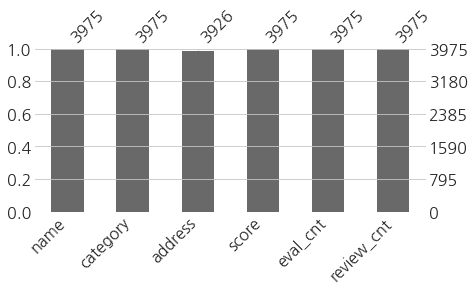

In [17]:
import missingno as msno
msno.bar(df, figsize=(7, 3))

* address 에서 49개의 레코드가 빠져있다.

In [18]:
index_ = df[df.address.isnull()].index

In [19]:
null_dict = {'커피829 남부터미널점': '서울 서초구 서초동 1743-1',
             '전주콩나물해장국밥': '서울 서초구 서초동 1428-4',
             '왕솥뚜껑생삼겹살': '서울 서초구 서초동 1428-4',
             '만랩커피 남부터미널점': '서울 서초구 서초동 1446-11',
             '몽돌바당': '서울 서초구 서초동 1603-3',
             '교대불고기 교대본점': '서울 서초구 서초동 1675-7',
             '월출설렁탕': '서울 서초구 서초동 1675-10',
             '브라이언스버거': '서울 서초구 서초동 1676-6',
             '일식우림': '서울 서초구 서초동 1694-13',
             '효동전': '서울 서초구 서초동 1694-13',
             '쉐프네포차': '서울 서초구 서초동 1676-6',
             '소문난 숯불꼼장어쭈꾸미': '서울 서초구 서초동 1570-12',
             '그냥찌개집 교대본점': '서울 서초구 서초동 1570-12',
             '카루': '서울 서초구 서초동 1716-10',
             '이찌마이 교대점': '서울 서초구 서초동 1570-12',
             '펀비어킹 서초교대역점': '서울 서초구 서초동 1575-12',
             '연승양곱창': '서울 서초구 서초동 24',
             '디케': '서울 서초구 서초동 1555-15',
             '큰집식당': '서울 서초구 서초동 1577-22',
             '신촌떡볶이': '서울 서초구 서초동 101',
             '직화락': '서울 서초구 서초동 1626-5',
             '맛나스넥': '서울 서초구 서초동 927-1',
             '피자굼터': '서울 서초구 서초2동 1333-103',
             '갤러리지아르체': '서울 강남구 역삼동 858 강남역 신분당선지하상가',
             '뉴욕김치찌개': '서울 강남구 역삼동 825-19 센트럴푸르지오시티',
             '꼬닐스핫도그': '서울 서초구 서초동 1318-11',
             '강남소바': '서울 강남구 역삼동 825-19 강남역센트럴애비뉴',
             '소노야 강남역점': '서울 강남구 역삼동 858 신분당선 강남역',
             '올자연식빵 강남점': '서울 서초구 서초동 1374 강남역지하상가 신분당선상가',
             '악바리부대찌개': '서울 서초구 서초동 1317-35',
             '소미미단팥빵 강남역점': '서울 강남구 역삼동 858 강남역지하쇼핑센터',
             '브런치': '서울 강남구 역삼동 649-7',
             '미스터와우 강남1호점': '서울 강남구 대치동 761',
             '아트스시': '서울 강남구 역삼동 826-37',
             '에스프레소진': '서울 강남구 역삼동 826-37',
             '핑거스샌드위치': '서울 강남구 역삼동 826-37',
             '가락시장회센터': '서울 강남구 역삼동 832-49',
             '파리바게뜨 뱅뱅사거리점': '서울 강남구 역삼동 837-10',
             '전주옛날집': '서울 서초구 서초동 1357-67',
             '아라폴리': '서울 서초구 서초동 1357-65',
             '마노핀 양재역점': '서울 강남구 도곡동 958-2',
             '매드후라이치킨 양재역점': '서울 서초구 서초동 1363-2',
             '시카고': '서울 서초구 서초동 1365-20',
             '타이쇼베이스먼트': '서울 강남구 도곡1동 1',
             '그린식품': '서울 강남구 도곡동 958-2 지하1층',
             '국민식당': '서울 서초구 양재동 1-7',
             '투모로우': '서울 서초구 서초동 1636-2',
             '웅이네통닭 서초점': '서울 서초구 서초동 1524-1',
             '을지로골뱅이': '서울 서초구 서초동 1524-1'}

In [20]:
index_ = df[df.address.isnull()].index

for index in index_:
    name_ = df.loc[index, 'name']
    df.loc[index, 'address'] = null_dict[name_]

* 직접 찾아서 주소 정보 넣어주기

In [21]:
df[df.address.isnull()]

,name,category,address,score,eval_cnt,review_cnt


* 결측값이 모두 처리되었다.

### 2.2 address 컬럼
* 앞부분에 '(지번) '이 불필요하게 들어가있다. 이를 삭제하자.
* 단, 결측값 처리 시에는 (지번)을 함께 기재하지 않았으므로, 조건문으로 필터링!

In [22]:
df.head()

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",(지번) 서초동 1445-13,3.9,72건,리뷰 267
1,봉산옥 서초동본점,국수,(지번) 서초3동 1451-9,3.7,79건,리뷰 146
2,장꼬방,"찌개,전골",(지번) 서초동 1438-8,3.2,299건,리뷰 124
3,해담채 남부터미널점,"해물,생선",(지번) 서초동 1600-9,3.1,10건,리뷰 47
4,카페로비,디저트카페,(지번) 서초동 1564-4,3.9,15건,리뷰 126


In [23]:
for row in df.index:
    if df.address[row][:5] == '(지번) ':
        df.address[row] = df.address[row][5:]
df.head()

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72건,리뷰 267
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79건,리뷰 146
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299건,리뷰 124
3,해담채 남부터미널점,"해물,생선",서초동 1600-9,3.1,10건,리뷰 47
4,카페로비,디저트카페,서초동 1564-4,3.9,15건,리뷰 126


### 2.3 eval_cnt, review_cnt
* 숫자와 섞여있는 문자를 삭제하고
* 컬럼을 int형식으로 변경하자

In [24]:
df.head(3)

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72건,리뷰 267
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79건,리뷰 146
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299건,리뷰 124


#### 2.3.1 eval_cnt
* 뒤의 '건'을 삭제하자.
* 삭제 전, 해당 컬럼의 모든 레코드가 '건' 이라는 글자로 끝나는지 확인하자

In [25]:
df.eval_cnt.apply(lambda x: str(x)[-1]).value_counts()

건    3975
Name: eval_cnt, dtype: int64

* eval_count는 모든 레코드에 대해 '건'을 삭제해주면 됨

In [26]:
df['eval_cnt'] = df['eval_cnt'].apply(lambda x: str(x)[:-1])
df.head(3)

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72,리뷰 267
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79,리뷰 146
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,리뷰 124


* 삭제 완료!

#### 2.3.2 review_cnt
* 이 컬럼에서는 앞에 문자열이 붙어있다. 해당 문자를 삭제하자.
* 역시 모든 레코드의 첫 두 글자가 '리뷰'로 시작하는지 먼저 확인

In [27]:
df.review_cnt.apply(lambda x:str(x)[:2]).value_counts()

리뷰    3962
0       13
Name: review_cnt, dtype: int64

* 13개의 데이터는 리뷰로 시작하지 않는다. 

In [28]:
for row in df.index:
    if df.review_cnt[row][:2] == '리뷰':
        df.review_cnt = df.review_cnt.apply(lambda x: str(x)[3:])
df.head()

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72,267
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79,146
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124
3,해담채 남부터미널점,"해물,생선",서초동 1600-9,3.1,10,47
4,카페로비,디저트카페,서초동 1564-4,3.9,15,126


In [29]:
df.review_cnt.apply(lambda x:str(x)[:2]).value_counts()

0     1379
1      370
2      270
4      159
3      159
      ... 
91       2
77       1
95       1
-1       1
94       1
Name: review_cnt, Length: 101, dtype: int64

#### 2.3.3 이상값 처리

In [30]:
df.eval_cnt.value_counts().sort_index()

0      1494
1       453
10       88
101       1
106       1
       ... 
9        96
93        1
94        1
95        2
96        1
Name: eval_cnt, Length: 107, dtype: int64

In [31]:
df.review_cnt.value_counts().sort_index()

        13
-1       1
0     1379
1      370
10      67
      ... 
95       1
96       2
97       2
98       2
99       4
Name: review_cnt, Length: 214, dtype: int64

* review_cnt에서 ''와 -1에 대해 0으로 바꿔주자.

In [32]:
df.loc[df[df.review_cnt == '-1'].index, 'review_cnt'] = 0
df.loc[df[df.review_cnt == ''].index, 'review_cnt'] = 0

#### 2.3.4 컬럼 데이터 형식 변경
* object to int32

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 6 columns):
name          3975 non-null object
category      3975 non-null object
address       3975 non-null object
score         3975 non-null float64
eval_cnt      3975 non-null object
review_cnt    3975 non-null object
dtypes: float64(1), object(5)
memory usage: 186.5+ KB


In [34]:
# # 중간에 오류가 나서 확인해보니 na 값(object)이 있어 수정
# for row in df[df.eval_cnt == 'na'].index:
#     df.loc[row, 'eval_cnt'] = 0

In [35]:
# df
df['eval_cnt'] = df['eval_cnt'].astype(int)
df['review_cnt'] = df['review_cnt'].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 6 columns):
name          3975 non-null object
category      3975 non-null object
address       3975 non-null object
score         3975 non-null float64
eval_cnt      3975 non-null int32
review_cnt    3975 non-null int32
dtypes: float64(1), int32(2), object(3)
memory usage: 155.4+ KB


### 2.4 지리 정보 추가하기
* address를 기반으로 지리 정보를 추가해주자.

In [327]:
import googlemaps
gmap_key = '****'
gmaps = googlemaps.Client(key=gmap_key)

In [329]:
# 구글맵API를 활용하여 각 카페의 주소에 해당하는 지리 정보를 얻어오기
for row in tqdm_notebook(df.index):
    try:
        geo = gmaps.geocode(str(df.loc[row, 'address']))
        df.loc[row, 'lat'] = geo[0].get('geometry')['location']['lat']
        df.loc[row, 'lng'] = geo[0].get('geometry')['location']['lng']
    except:
        df.loc[row, 'lat'] = np.nan
        df.loc[row, 'lng'] = np.nan
df.head()

,name,category,address,score,eval_cnt,review_cnt,lat,lng
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72,267,37.484014,127.017342
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79,146,37.483306,127.012451
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124,37.486853,127.023648
3,해담채 남부터미널점,"해물,생선",서초동 1600-9,3.1,10,47,37.485837,127.015086
4,카페로비,디저트카페,서초동 1564-4,3.9,15,126,37.488520,127.012744


In [331]:
df.lat.isnull().sum()

0

In [334]:
df.lng.isnull().sum()

0

### 2.5 diatance 컬럼 추가
* 이제 학원과 음식점의 거리를 m단위로 추가해주자.

In [40]:
from haversine import haversine
aca_geo = (37.486498, 127.020663)

for index in df.index:
    df.loc[index, 'distance'] = haversine(aca_geo, (df.loc[index, 'lat'], df.loc[index, 'lng']), unit = 'm')
df.head(3)

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72,267,37.484014,127.017342,402.732947
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79,146,37.483306,127.012451,806.797011
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124,37.486853,127.023648,266.307713


### 2.5 저장하기
* 전처리가 완료되었으니, 이제 저장을 하자!

In [335]:
df.head(3)

,name,category,address,score,eval_cnt,review_cnt,lat,lng
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72,267,37.484014,127.017342
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79,146,37.483306,127.012451
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124,37.486853,127.023648


In [336]:
df.tail(3)

,name,category,address,score,eval_cnt,review_cnt,lat,lng
3972,진품활어 양재본점,회,양재동 14-2,0.0,0,0,37.482828,127.036653
3973,노리,카페,도곡동 959-11,5.0,1,1,37.486323,127.036308
3974,양재고등학교 식당,구내식당,서초동 1376-4,0.0,0,0,37.482775,127.032492


In [337]:
df.to_csv('./source/Restaurant_analysis_miniproject/restaurant_preprocessed_200630(sean).csv', index=False)

## 3. 데이터 살펴보기

In [37]:
df = pd.read_csv('./source/Restaurant_analysis_miniproject/restaurant_preprocessed_distance)200701(sean).csv',
                index=False)
df.head()

,name,category,address,score,eval_cnt,review_cnt,lat,lng
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72,267,37.484014,127.017342
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79,146,37.483306,127.012451
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124,37.486853,127.023648
3,해담채 남부터미널점,"해물,생선",서초동 1600-9,3.1,10,47,37.485837,127.015086
4,카페로비,디저트카페,서초동 1564-4,3.9,15,126,37.488520,127.012744


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 8 columns):
name          3975 non-null object
category      3975 non-null object
address       3975 non-null object
score         3975 non-null float64
eval_cnt      3975 non-null int64
review_cnt    3975 non-null int64
lat           3975 non-null float64
lng           3975 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 248.6+ KB


### 3.1 데이터 분포
* 데이터들의 분포를 살펴보자.

In [60]:
df.describe()

,score,eval_cnt,review_cnt,lat,lng,distance
count,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000
mean,2.160881,6.656604,17.760252,37.491203,127.023722,1071.946037
std,1.887486,21.426941,47.463085,0.005022,0.008939,362.051954
min,0.000000,0.000000,0.000000,37.473198,127.005790,24.990818
25%,0.000000,0.000000,0.000000,37.486350,127.014473,872.806816
50%,2.600000,2.000000,2.000000,37.491802,127.027201,1088.512566
75%,3.800000,6.000000,13.000000,37.495074,127.030910,1344.099006
max,5.000000,603.000000,770.000000,37.502255,127.061053,3845.154753


Text(0.5, 1.0, 'Histogram of review_cnt')

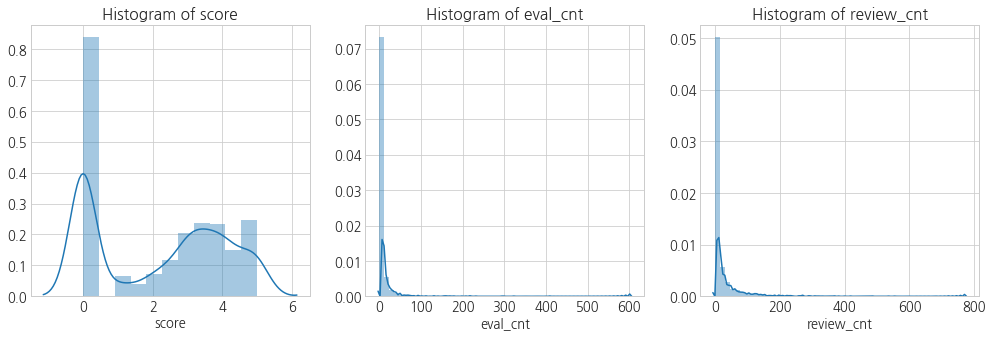

In [63]:
f, ax = plt.subplots(1, 3, figsize=(17, 5))
sns.distplot(df.score, ax=ax[0])
ax[0].set_title('Histogram of score')
sns.distplot(df.eval_cnt, ax=ax[1])
ax[1].set_title('Histogram of eval_cnt')
sns.distplot(df.review_cnt, ax=ax[2])
ax[2].set_title('Histogram of review_cnt')

In [72]:
sum(df.eval_cnt==0)/len(df)

0.3758490566037736

* 평가가 이뤄지지 않은 음식점 (review_cnt가 0)인 곳이 37%로 많아서, score의 분포가 0에 쏠려있다.
* 허수를 줄이기 위해 필터링이 필요하다.
* 일단은 평가 수가 1 이상인 곳들을 살펴보자.

In [74]:
df_eval_non_zero = df[df.eval_cnt!=0]
df_eval_non_zero.describe()

,score,eval_cnt,review_cnt,lat,lng,distance
count,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000
mean,3.462112,10.665054,27.507457,37.491438,127.024046,1090.796045
std,1.096339,26.323474,57.762668,0.005143,0.008770,355.429193
min,0.000000,1.000000,0.000000,37.473198,127.007408,24.990818
25%,3.000000,2.000000,2.000000,37.486326,127.014692,885.291594
50%,3.500000,4.000000,8.000000,37.492180,127.027638,1108.244683
75%,4.300000,10.000000,26.000000,37.495332,127.030863,1363.847312
max,5.000000,603.000000,770.000000,37.502255,127.040220,2138.641337


* score의 중앙값이 3점대로 변화하였다.

In [76]:
len(df_eval_non_zero)

2481

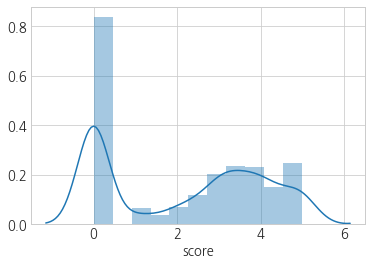

In [77]:
sns.distplot(df.score)

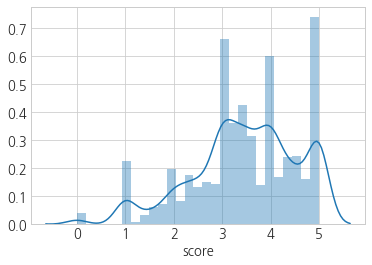

In [75]:
sns.distplot(df_eval_non_zero.score)

* 분포가 3점 이상의 평가를 받은 곳이 많음을 알 수 있다.

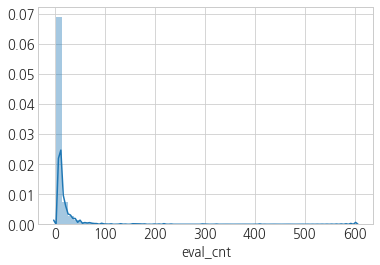

In [78]:
sns.distplot(df_eval_non_zero.eval_cnt)

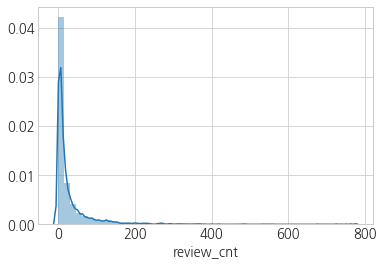

In [79]:
sns.distplot(df_eval_non_zero.review_cnt)

* 리뷰와 평가는 여전히 긴 꼬리 분포를 그리고 있다.

### 3.2 필터링
* 좀 더 유의미한 분석을 위해 평가를 n번 받은 음식점으로 필터링하면 좋겠다.
* 팀원들과 논의하여 중앙값인 n=4로 정했고, 이를 윤성님이 처리해주었다.

In [92]:
df = pd.read_csv(
    'source/Restaurant_analysis_miniproject/restaurant_merged_200701.csv', index_col=0)
df.drop('ZMS', axis=1, inplace=True)
df.shape

(1420, 9)

* 평가를 4번 이상 받은 음식점은 총 1420개다.

In [93]:
df.describe()

,score,eval_cnt,review_cnt,lat,lng,distance
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,3.400070,17.319014,41.761268,37.491774,127.024336,1109.236822
std,0.858145,33.279419,71.348256,0.005241,0.008532,350.447385
min,1.000000,4.000000,0.000000,37.473198,127.007408,0.803824
25%,2.900000,6.000000,6.000000,37.486626,127.015055,898.489362
50%,3.400000,9.000000,16.000000,37.492690,127.027900,1124.397450
75%,4.000000,16.000000,46.250000,37.495572,127.030804,1377.152668
max,5.000000,603.000000,770.000000,37.500328,127.040181,2138.641337


Text(0.5, 1.0, 'Histogram of review_cnt')

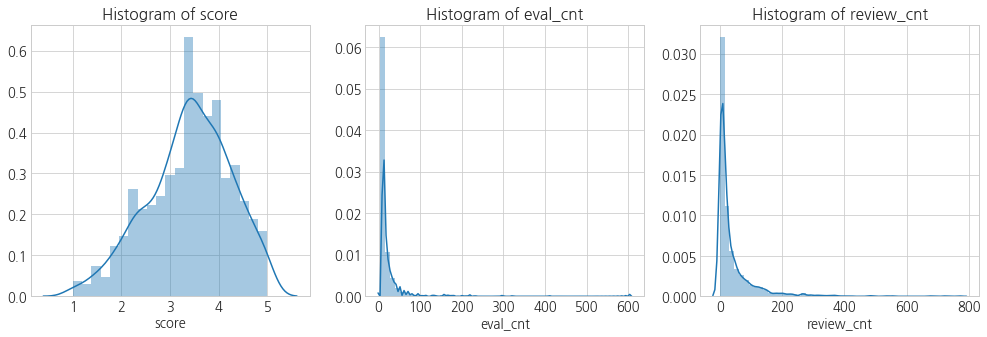

In [94]:
f, ax = plt.subplots(1, 3, figsize=(17, 5))
sns.distplot(df.score, ax=ax[0])
ax[0].set_title('Histogram of score')
sns.distplot(df.eval_cnt, ax=ax[1])
ax[1].set_title('Histogram of eval_cnt')
sns.distplot(df.review_cnt, ax=ax[2])
ax[2].set_title('Histogram of review_cnt')

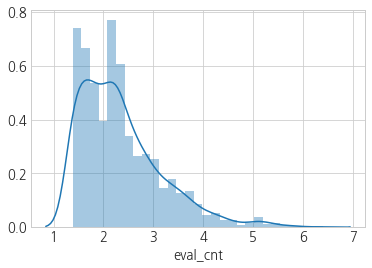

In [100]:
sns.distplot(np.log(df.eval_cnt))

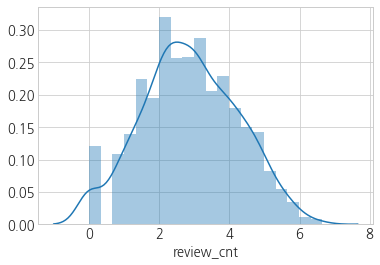

In [98]:
sns.distplot(np.log(df.review_cnt+1))

* 로그를 취해주면 review_cnt는 정규분포와 유사해지고,
* eval_cnt도 왜도가 줄어듦을 확인할 수 있다.

## 4. 지표 설정
* eval_cnt와 score, review_cnt를 잘 조합하여 하나의 지표로 만들면 평가에 용이하겠다.
$$ZMS = score * log(eval\_cnt) + min\_max\_scaler(log(review\_cnt))$$
* 위의 공식으로 ZMS를 구하였다.
    * $score * log(eval\_cnt)$
        * 별점을 단순히 평가 수와 곱하면, 평점이 낮더라도 평가만 많이 받으면 좋은 점수를 받게된다.
        * 또한, eval_cnt의 데이터 스케일이 크고, 분포 내 왜도도 커서 log를 취하여 곱했다.
    * $min\_max\_scaler(log(review\_cnt))$
        * 리뷰 수는 가산점 개념으로 생각하자고 논의하였다.
        * 평점이 비슷한 음식점이 두 곳 있으면, 리뷰가 많은 곳이 가산점을 받을 수 있도록 설계했다.
        * 리뷰 수가 정규분포에 유사할 수 있도록 log값을 취해준 후 스케일링을 진행하였다.
            * 스케일링: 리뷰수 자체가 순위에 많은 영향은 끼치지 않도록 하기 위해 0~1범위로 제한하였다.
* ZMS를 구한 이후, 이를 0~100 범위에 오도록 스케일링하였다.

In [245]:
# 별점과 log(평가 수)를 곱함
df['ZMS'] = df.score * np.log(df.eval_cnt)

# 이후 review_cnt를 스케일링하여 가산점 부여
df['ZMS'] += (np.log(df.review_cnt+1) - min(np.log(df.review_cnt+1))) / \
    (max(np.log(df.review_cnt+1)) - min(np.log(df.review_cnt+1)))

# ZMS를 0~100 범위로 스케일링
df['ZMS'] = round(df.ZMS / max(df.ZMS) * 100, 2)

df.head(3)

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
497,크래프트아일랜드 강남역점,"호프,요리주점",서초동 1317-32,4.8,173,292,37.498478,127.025597,1401.450583,100.00
1352,크래버 대게나라 서초점,"게,대게",서초동 1582-16,4.8,166,101,37.486660,127.010803,870.179020,98.60
487,미즈컨테이너 강남웨스트점,양식,서초동 1316-29,3.4,603,354,37.498270,127.025215,1369.162723,88.51


In [246]:
df.sort_values('ZMS', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(3)

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
0,크래프트아일랜드 강남역점,"호프,요리주점",서초동 1317-32,4.8,173,292,37.498478,127.025597,1401.450583,100.00
1,크래버 대게나라 서초점,"게,대게",서초동 1582-16,4.8,166,101,37.486660,127.010803,870.179020,98.60
2,미즈컨테이너 강남웨스트점,양식,서초동 1316-29,3.4,603,354,37.498270,127.025215,1369.162723,88.51


In [247]:
df.ZMS.describe()

count    1420.000000
mean       32.778915
std        13.527794
min         6.060000
25%        23.557500
50%        30.460000
75%        39.520000
max       100.000000
Name: ZMS, dtype: float64

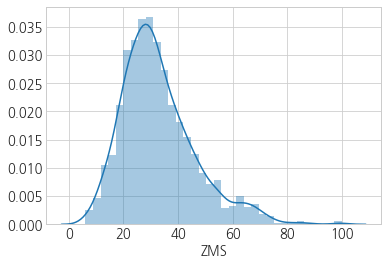

In [250]:
sns.distplot(df.ZMS)

In [251]:
df.to_csv('source/Restaurant_analysis_miniproject/restaurant_ZMS_200701.csv', index=False)

In [252]:
df = pd.read_csv('source/Restaurant_analysis_miniproject/restaurant_ZMS_200701.csv')